### **Data**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from IPython.display import display
from sklearn.datasets import load_diabetes

In [ ]:
from google.colab import drive
drive.mount('/content/grive/', force_remount=True)
%cd /content/grive/MyDrive/ML

Mounted at /content/grive/
/content/grive/MyDrive/ML


In [ ]:
data = pd.read_csv('Data ML.csv')
dataframe = pd.DataFrame(data)
new_column_names = {
    'Tanggal': 'Tanggal',
    'Nilai Impor ($)': 'Nilai Impor',
    'Nilai Ekspor ($)': 'Nilai Ekspor',
    'Harga Emas ($)': 'Harga Emas',
    'Tingkat Inlfasi (%)': 'Tingkat Inflasi',
    'Nilai Tukar ($)': 'Nilai Tukar',
    'Suku Bunga': 'Suku Bunga',
    'Cadangan Devisa Negara': 'Cadangan Devisa Negara'
}
dataframe = dataframe.rename(columns=new_column_names)

In [ ]:
dataframe

,Tanggal,Nilai Impor,Nilai Ekspor,Harga Emas,Tingkat Inflasi,Nilai Tukar,Suku Bunga,Cadangan Devisa Negara
0,01/01/2013,15450.2,15375.5,1662.0,4.57,9698,5.75,108800000000
1,02/01/2013,15313.3,15015.6,1579.8,5.31,9667,5.75,105200000000
2,03/01/2013,14887.1,15024.6,1597.4,5.90,9719,5.75,104800000000
3,04/01/2013,16463.5,14760.9,1473.5,5.57,9722,5.75,107200000000
4,05/01/2013,16660.5,16133.4,1394.2,5.47,9802,5.75,105100000000
...,...,...,...,...,...,...,...,...
115,08/01/2022,22150.6,27862.1,1726.2,4.69,14875,3.75,132200000000
116,09/01/2022,19808.3,24777.2,1684.9,5.95,15247,4.25,130800000000
117,10/01/2022,19135.4,24728.4,1654.9,5.71,15542,4.75,130200000000
118,11/01/2022,18962.1,24094.0,1775.1,5.42,15737,5.25,134000000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tanggal                 120 non-null    object 
 1   Nilai Impor             120 non-null    float64
 2   Nilai Ekspor            120 non-null    float64
 3   Harga Emas              120 non-null    float64
 4   Tingkat Inflasi         120 non-null    float64
 5   Nilai Tukar             120 non-null    int64  
 6   Suku Bunga              120 non-null    float64
 7   Cadangan Devisa Negara  120 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.6+ KB


In [ ]:
dataframe.isna().sum()

Tanggal                   0
Nilai Impor               0
Nilai Ekspor              0
Harga Emas                0
Tingkat Inflasi           0
Nilai Tukar               0
Suku Bunga                0
Cadangan Devisa Negara    0
dtype: int64

In [ ]:
dataframe = dataframe.set_index('Tanggal')

dataframe.index = pd.to_datetime(dataframe.index)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2013-01-01 to 2022-12-01
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nilai Impor             120 non-null    float64
 1   Nilai Ekspor            120 non-null    float64
 2   Harga Emas              120 non-null    float64
 3   Tingkat Inflasi         120 non-null    float64
 4   Nilai Tukar             120 non-null    int64  
 5   Suku Bunga              120 non-null    float64
 6   Cadangan Devisa Negara  120 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 7.5 KB


### **Data Visualisasi**

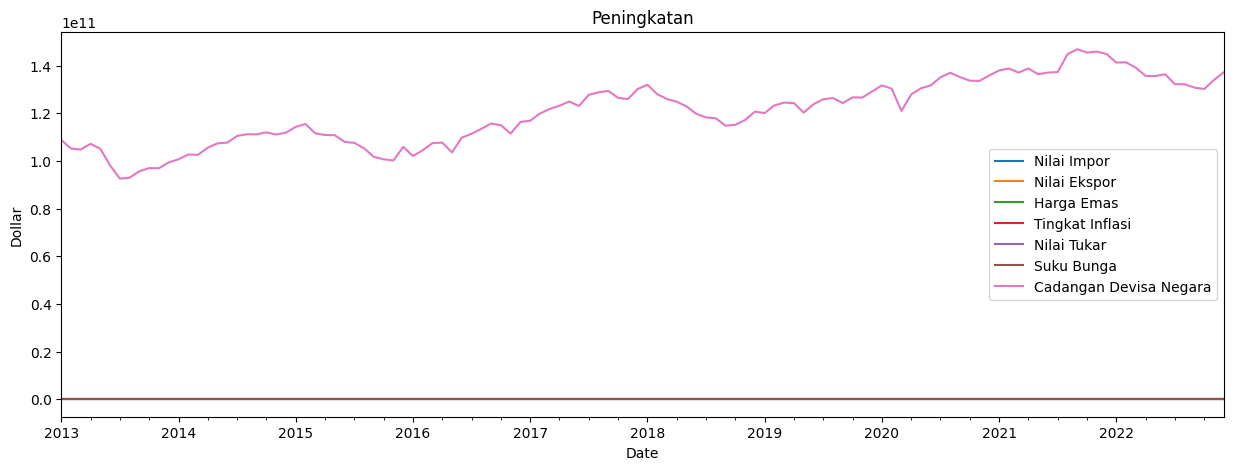

In [ ]:
# Create a line plot of all currencies
dataframe.plot(figsize=(15,5))

# Add labels and titles
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.title('Peningkatan')

# Show the plot
plt.show()

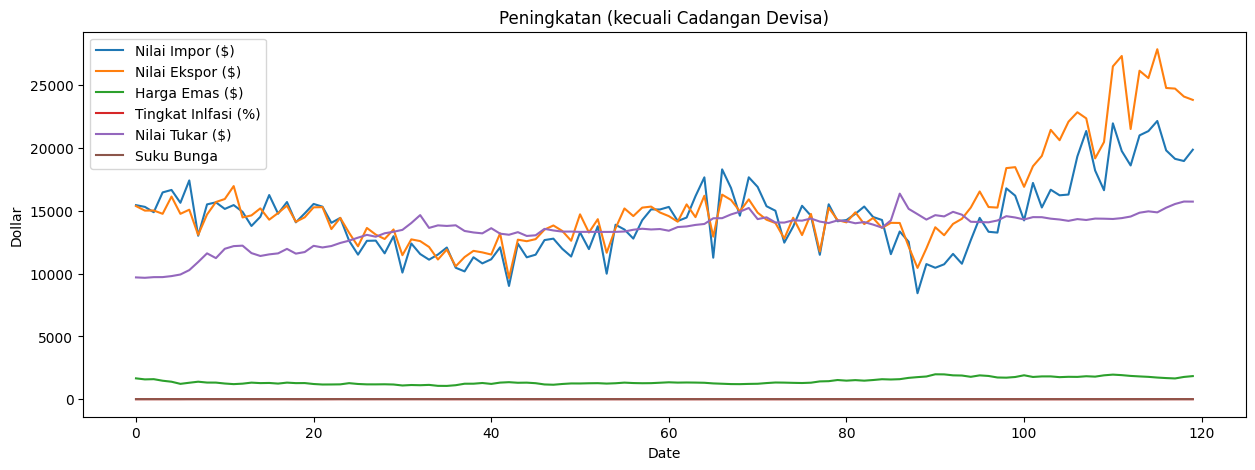

In [ ]:
# Filter the data to exclude Cadangan Devisa
data_without_krw = data.drop('Cadangan Devisa Negara', axis=1)

# Create a line plot of all currencies except KRW
data_without_krw.plot(figsize=(15, 5))

# Add labels and titles
plt.xlabel('Date')
plt.ylabel('Dollar')
plt.title('Peningkatan (kecuali Cadangan Devisa)')

# Show the plot
plt.show()

In [ ]:
corr_matrix = dataframe.corr()
avg_correlations = corr_matrix.abs().mean()
sorted_correlations = avg_correlations.sort_values(ascending=False)

print("Peningkatan dengan rata-rata tertinggi adalah:", sorted_correlations.index[1])

Peningkatan dengan rata-rata tertinggi adalah: Suku Bunga


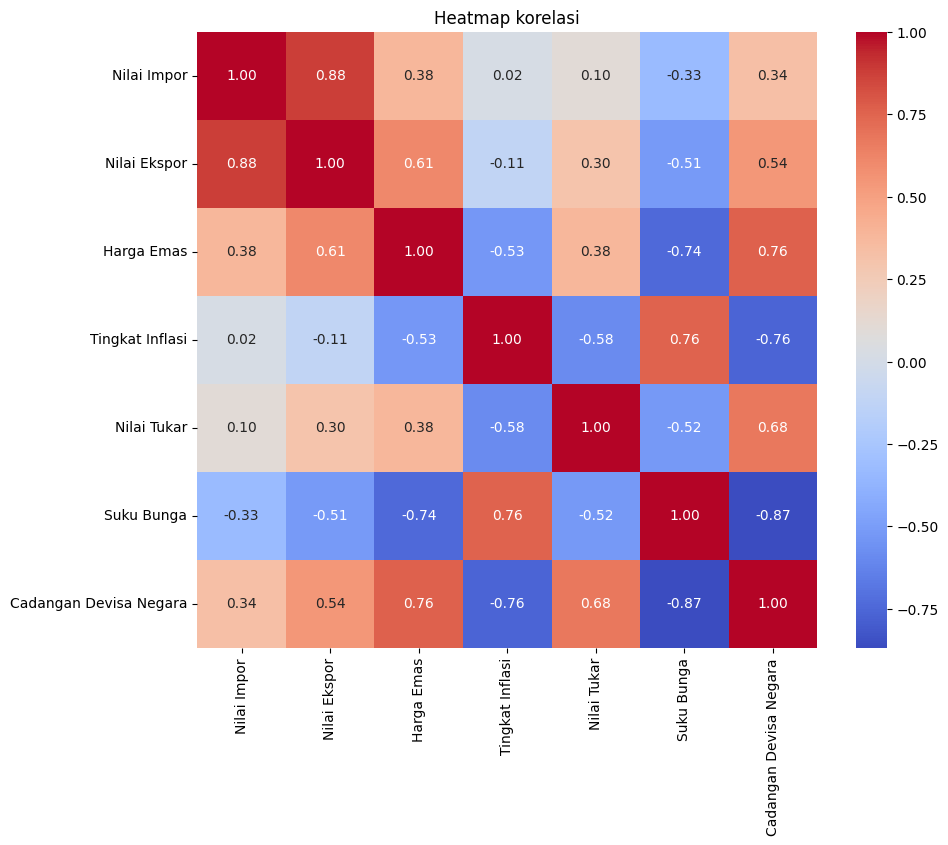

In [ ]:
corr_matrix = dataframe.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap korelasi')
plt.show()
# Highest correlation, is between Nilai Impor dan Nilai Ekspor, let's look more into that

In [ ]:
# Calculate the correlation coefficients between all currency pairs
corr_matrix = dataframe.corr()

# Print the correlation matrix

print(corr_matrix)

# Find the currency pairs with the highest correlation coefficients
max_corr_pairs = (corr_matrix.abs().stack().reset_index().sort_values(0, ascending=False))
max_corr_pairs = max_corr_pairs[max_corr_pairs['level_0'] != max_corr_pairs['level_1']]

# Print the pairs of currencies with the highest correlation coefficients
print("The currency pairs with the highest correlation coefficients are:\n", max_corr_pairs.head(10))

                        Nilai Impor  Nilai Ekspor  Harga Emas  \
Nilai Impor                1.000000      0.875996    0.384579   
Nilai Ekspor               0.875996      1.000000    0.611279   
Harga Emas                 0.384579      0.611279    1.000000   
Tingkat Inflasi            0.018239     -0.110645   -0.525561   
Nilai Tukar                0.101600      0.302334    0.382060   
Suku Bunga                -0.331499     -0.510802   -0.741636   
Cadangan Devisa Negara     0.335314      0.541847    0.761377   

                        Tingkat Inflasi  Nilai Tukar  Suku Bunga  \
Nilai Impor                    0.018239     0.101600   -0.331499   
Nilai Ekspor                  -0.110645     0.302334   -0.510802   
Harga Emas                    -0.525561     0.382060   -0.741636   
Tingkat Inflasi                1.000000    -0.584592    0.755378   
Nilai Tukar                   -0.584592     1.000000   -0.520189   
Suku Bunga                     0.755378    -0.520189    1.000000   
Cad

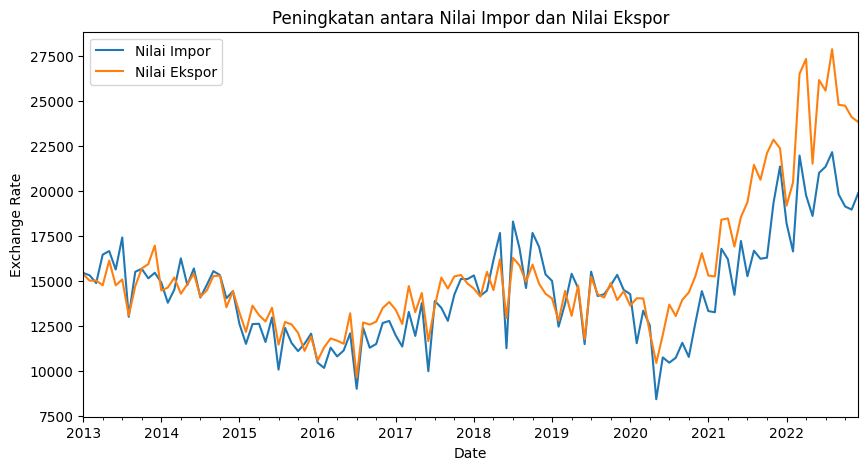

In [ ]:
dkk_eur = dataframe[['Nilai Impor', 'Nilai Ekspor']]

# Plot the data
dkk_eur.plot(figsize=(10, 5))
plt.title('Peningkatan antara Nilai Impor dan Nilai Ekspor')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

### **Preprocessing**

In [ ]:
dataframe.describe()

,Nilai Impor,Nilai Ekspor,Harga Emas,Tingkat Inflasi,Nilai Tukar,Suku Bunga,Cadangan Devisa Negara
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02
mean,14461.101667,15477.802500,1440.771667,4.113583,13491.758333,5.460417,1.205206e+11
std,2856.948422,3802.319065,260.167513,2.019423,1368.764578,1.457736,1.362009e+10
min,8438.600000,9649.500000,1060.800000,1.320000,9667.000000,3.500000,9.260000e+10
25%,12395.700000,13235.200000,1244.575000,2.827500,13091.500000,4.250000,1.095500e+11
50%,14436.450000,14536.250000,1322.300000,3.480000,13817.500000,5.250000,1.214000e+11
75%,15813.925000,15740.000000,1705.125000,5.480000,14371.750000,7.000000,1.317000e+11
max,22150.600000,27862.100000,1985.900000,8.790000,16367.000000,7.750000,1.469000e+11


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
data_out = dataframe

# Calculate z-scores for each value in the dataset
z_scores = np.abs(stats.zscore(data_out))

# Define a threshold value for outliers (e.g., 3 standard deviations)
threshold = 3

# Find the indices of outliers based on z-scores
outlier_indices = np.where(z_scores > threshold)

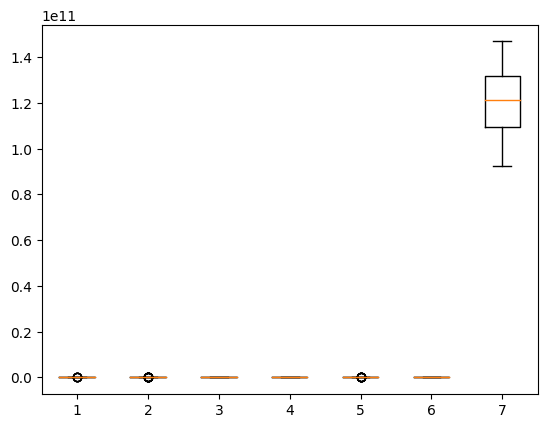

In [ ]:
# Plot a box plot to visualize the distribution of the data
plt.boxplot(data_out)
plt.show()

In [ ]:
# Remove outliers based on the indices found in the previous step
clean_data = data_out[(z_scores < threshold).all(axis=1)]

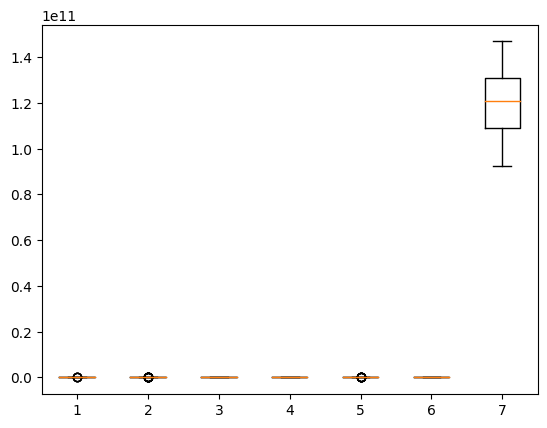

In [ ]:
# Plot a box plot to visualize the distribution of the data
plt.boxplot(clean_data)
plt.show()

In [ ]:
df = clean_data
df

,Nilai Impor,Nilai Ekspor,Harga Emas,Tingkat Inflasi,Nilai Tukar,Suku Bunga,Cadangan Devisa Negara
Tanggal,,,,,,,
2013-01-01,15450.2,15375.5,1662.0,4.57,9698,5.75,108800000000
2013-02-01,15313.3,15015.6,1579.8,5.31,9667,5.75,105200000000
2013-03-01,14887.1,15024.6,1597.4,5.90,9719,5.75,104800000000
2013-04-01,16463.5,14760.9,1473.5,5.57,9722,5.75,107200000000
2013-05-01,16660.5,16133.4,1394.2,5.47,9802,5.75,105100000000
...,...,...,...,...,...,...,...
2022-07-01,21345.0,25563.2,1781.8,4.94,14958,3.50,132200000000
2022-09-01,19808.3,24777.2,1684.9,5.95,15247,4.25,130800000000
2022-10-01,19135.4,24728.4,1654.9,5.71,15542,4.75,130200000000


### **Train and Test**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_norm = df.copy()

df_norm = MinMaxScaler().fit_transform(pd.DataFrame(df_norm.values))

columns = ['Nilai Impor', 'Nilai Ekspor', 'Harga Emas', 'Tingkat Inflasi', 'Nilai Tukar', 'Suku Bunga', 'Cadangan Devisa Negara']

df_norm = pd.DataFrame(df_norm, columns=columns)
df_norm

,Nilai Impor,Nilai Ekspor,Harga Emas,Tingkat Inflasi,Nilai Tukar,Suku Bunga,Cadangan Devisa Negara
0,0.518464,0.339862,0.649876,0.435074,0.004627,0.529412,0.298343
1,0.508341,0.318501,0.561020,0.534137,0.000000,0.529412,0.232044
2,0.476826,0.319035,0.580045,0.613119,0.007761,0.529412,0.224678
3,0.593391,0.303383,0.446114,0.568942,0.008209,0.529412,0.268877
4,0.607958,0.384847,0.360393,0.555556,0.020149,0.529412,0.230203
...,...,...,...,...,...,...,...
113,0.954347,0.944545,0.779375,0.484605,0.789701,0.000000,0.729282
114,0.840718,0.897893,0.674630,0.619813,0.832836,0.176471,0.703499
115,0.790961,0.894996,0.642201,0.587684,0.876866,0.294118,0.692449
116,0.778147,0.857342,0.772133,0.548862,0.905970,0.411765,0.762431


In [ ]:
from sklearn.model_selection import train_test_split

y = df['Cadangan Devisa Negara']
x = df.drop(columns=['Cadangan Devisa Negara'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

y_norm = df_norm['Cadangan Devisa Negara']
x_norm = df_norm.drop(columns=['Cadangan Devisa Negara'])

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y_norm, test_size=0.4, random_state=4)
X_train_norm.shape , X_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((70, 6), (48, 6), (70,), (48,))

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# shows the value of the slope/coefficient) and intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-4.37227047e+05  1.14333982e+06  7.49610595e+06 -1.94236480e+09
  2.01592214e+06 -3.25864150e+09]
96887750433.29611


In [ ]:
coef_dict = {
    'features':x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns = ['features', 'coef_value'])
coef

,features,coef_value
0,Nilai Impor,-4.372270e+05
1,Nilai Ekspor,1.143340e+06
2,Harga Emas,7.496106e+06
3,Tingkat Inflasi,-1.942365e+09
4,Nilai Tukar,2.015922e+06
5,Suku Bunga,-3.258642e+09


In [ ]:
y_pred = lin_reg.predict(X_test)
R2_LR = metrics.r2_score(y_test,y_pred)*100
R2_LR = str(R2_LR) + ' %'
mse_LR = mean_squared_error(y_test, y_pred)
mae_LR = mean_absolute_error(y_test, y_pred)
rmse_LR = np.sqrt(mse_LR)
print('R2- SCORE:', R2_LR)
print('\n')

print(mse_LR)

import math

pr_LR = "${:,}".format(math.floor(lin_reg.predict([[15450.2, 15375.5, 1662.0, 4.57, 9667.57, 4.75]])))
print("Cadangan Devisa perkiraan adalah", pr_LR)

R2- SCORE: 82.81117783850797 %


2.525471250821132e+19
Cadangan Devisa perkiraan adalah $115,304,368,624


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **k-NN**

In [ ]:
#k-NN
import sys, os

# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
R2_KNN = metrics.r2_score(y_test,y_pred_knn)*100
R2_KNN = str(R2_KNN) + ' %'
mse_KNN = mean_squared_error(y_test, y_pred_knn)
mae_KNN = mean_absolute_error(y_test, y_pred_knn)
rmse_KNN = np.sqrt(mse_KNN)
print('R2- SCORE:', R2_KNN)

print('\n')
pr_KNN = "${:,}".format(math.floor(knn.predict([[15450.2, 15375.5, 1662.0, 4.57, 9667.57, 4.75]])))
print("Cadangan Devisa perkiraan adalah", pr_KNN)

R2- SCORE: 99.445419325556 %


Cadangan Devisa perkiraan adalah $92,600,000,000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### **Decision Tree Classifier**

In [ ]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
R2_DT = metrics.r2_score(y_test,y_pred_dt)*100
R2_DT = str(R2_DT) + ' %'
mse_DT = mean_squared_error(y_test, y_pred_dt)
mae_DT = mean_absolute_error(y_test, y_pred_dt)
rmse_DT = np.sqrt(mse_DT)
print('R2- SCORE:', R2_DT)

print('\n')
pr_DT = "${:,}".format(math.floor(dt.predict([[15450.2, 15375.5, 1662.0, 4.57, 9667.57, 4.75]])))
print("Cadangan Devisa perkiraan adalah", pr_DT)

R2- SCORE: 99.12686502066505 %


Cadangan Devisa perkiraan adalah $130,200,000,000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
R2_RF = metrics.r2_score(y_test,y_pred_rf)*100
R2_RF = str(R2_RF) +  ' %'

mse_RF = mean_squared_error(y_test, y_pred_rf)
mae_RF = mean_absolute_error(y_test, y_pred_rf)
rmse_RF = np.sqrt(mse_RF)

print('R2- SCORE:', R2_RF)

print('\n')
pr_RF = "${:,}".format(math.floor(rf.predict([[15450.2, 15375.5, 1662.0, 4.57, 9667.57, 4.75]])))
print("Cadangan Devisa perkiraan adalah", pr_RF)

R2- SCORE: 87.04078243330399 %


Cadangan Devisa perkiraan adalah $117,893,760,000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **Conclusion**

In [ ]:
df = pd.DataFrame(
    {
      'Variabel': ['Nilai Prediksi'],
      'Nilai Impor': [15450.2],
      'Nilai Ekspor': [15375.5],
      'Harga Emas': [16662.0],
      'Tingkat Inflasi': [4.57],
      'Nilai Tukar': [9667.57],
      'Suku Bunga': [4.75],
      'Cadangan': ['?']
    },
)
df2 = pd.DataFrame(
    {
      'Algoritma': ['Linear Regression', 'k-NN', 'Decision Tree', 'Random Forest'],
      'MSE': [mse_LR, mse_KNN, mse_DT, mse_RF],
      'MAE': [mae_LR, mae_KNN, mae_DT, mae_RF],
      'RMSE': [rmse_LR, rmse_KNN, rmse_DT, rmse_RF],
      'Akurasi': [R2_LR, R2_KNN, R2_DT, R2_RF],    
    },
)
df3 = pd.DataFrame(
    {
      'Algoritma': ['Linier Regresion', 'k-NN', 'Decision Tree', 'Random Forest'],
      'Nilai Impor': [15450.2, 15450.2, 15450.2, 15450.2],
      'Nilai Ekspor': [15375.5, 15375.5, 15375.5, 15375.5],
      'Harga Emas': [16662.0, 16662.0, 16662.0, 16662.0],
      'Tingkat Inflasi': [4.57, 4.57, 4.57, 4.57],
      'Nilai Tukar': [9667.57, 9667.57, 9667.57, 9667.57],
      'Suku Bunga': [4.75, 4.75, 4.75, 4.75],
      'Cadangan': [pr_LR, pr_KNN, pr_DT, pr_RF]
    },
)

display(df)
print()
display(df2)
print()
display(df3)

,Variabel,Nilai Impor,Nilai Ekspor,Harga Emas,Tingkat Inflasi,Nilai Tukar,Suku Bunga,Cadangan
0,Nilai Prediksi,15450.2,15375.5,16662.0,4.57,9667.57,4.75,?


,Algoritma,MSE,MAE,RMSE,Akurasi
0,Linear Regression,2.525471e+19,4.148942e+09,5.025407e+09,82.81117783850797 %
1,k-NN,8.148188e+17,1.028883e+10,9.026731e+08,99.445419325556 %
2,Decision Tree,1.282855e+18,4.048000e+09,1.132632e+09,99.12686502066505 %
3,Random Forest,1.904036e+19,3.432283e+09,4.363526e+09,87.04078243330399 %


,Algoritma,Nilai Impor,Nilai Ekspor,Harga Emas,Tingkat Inflasi,Nilai Tukar,Suku Bunga,Cadangan
0,Linier Regresion,15450.2,15375.5,16662.0,4.57,9667.57,4.75,"$115,304,368,624"
1,k-NN,15450.2,15375.5,16662.0,4.57,9667.57,4.75,"$92,600,000,000"
2,Decision Tree,15450.2,15375.5,16662.0,4.57,9667.57,4.75,"$130,200,000,000"
3,Random Forest,15450.2,15375.5,16662.0,4.57,9667.57,4.75,"$117,893,760,000"
